We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [30]:
#!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-06-05 15:49:55--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.209.118, 13.227.209.26, 13.227.209.16, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.209.118|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [31]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [32]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-06-05,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-06-04,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-06-03,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-06-02,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-06-01,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-05-31,31,5,2020,866,3,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-30,30,5,2020,623,11,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-05-29,29,5,2020,580,8,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-05-28,28,5,2020,625,7,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-27,27,5,2020,658,1,Afghanistan,AF,AFG,37172386.0,Asia


Last check of our source dataframe.

In [33]:
df.count()

dateRep                    21547
day                        21547
month                      21547
year                       21547
cases                      21547
deaths                     21547
countriesAndTerritories    21547
geoId                      21547
countryterritoryCode       21307
popData2018                21231
continentExp               21547
dtype: int64

We pivot to a country by column format.

In [34]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-06-01   0.0  661.0  680.0  0.0  0.0  15.0  355.0  2.0  637.0   4.0  ...   
2020-06-02   1.0  635.0  545.0  0.0  0.0   6.0  210.0  0.0  564.0  21.0  ...   
2020-06-03  79.0  596.0  759.0  0.0  0.0  21.0  517.0  0.0  904.0  11.0  ...   
2020-06-04   7.0  571.0  758.0  1.0  0.0  20.0  515.0  0.0  949.0  31.0  ...   
2020-06-05   1.0  659.0  787.0  0.0  0.0  13.0  697.0  0.0    0.0  36.0  ...   

           deaths                                                 
geoId          VC   VE   VG   VI   VN   XK    YE    ZA   ZM   ZW  
dateRep                                                           
2019-12-31    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-01    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-02    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-03    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-04    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
...           ...  ...  ...  ...  ...  ...   ...   ...  ...  ...  
2020-06-01    0.0  0.0  0.0  0.0  0.0  0.0   3.0  40.0  0.0  0.0  
2020-06-02    0.0  3.0  0.0  0.0  0.0  0.0   4.0  22.0  0.0  0.0  
2020-06-03    0.0  1.0  0.0  0.0  0.0  0.0   3.0  50.0  0.0  0.0  
2020-06-04    0.0  2.0  0.0  0.0  0.0  0.0   1.0  37.0  0.0  0.0  
2020-06-05    0.0  0.0  0.0  0.0  0.0  0.0  15.0  56.0  0.0  0.0  

[158 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add six months and check our latest date.

In [35]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2021-06-01   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-02   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-03   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-04   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-05   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2021-06-01 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-02 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-03 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-04 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-05 NaN  NaN NaN NaN NaN NaN NaN  

[523 rows x 420 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [36]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    523.000000
mean     261.000000
std      151.121364
min        0.000000
25%      130.500000
50%      261.000000
75%      391.500000
max      522.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach, selecting country and measure and columns to creat for smoothed and predicted measures.

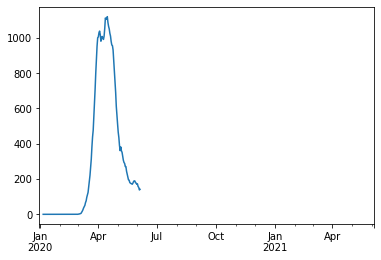

In [37]:
country  = 'NL'
measure  = 'cases'
smeasure = 'scases'
pmeasure = 'pcases'

df_geo[(smeasure, country)] = df_geo[measure][country].rolling(7).mean()

df_pred = pd.DataFrame({
    'daynum':df_geo['daynum'], measure:df_geo[smeasure][country]})
df_pred[measure].plot()

The typical progress of an outbreak is assumed to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(- (x - mu) / beta))`, where `mu` is the location parameter and `beta` the scale parameter.

In [38]:
def gumbelval(x, beta, mu):
    """Return the Gumbel CDF for x according to beta and mu"""
    return np.exp(- np.exp(- (x - mu) / beta))

def gumbelinv(x):
    """Inverse Gumbel function"""
    return(- np.log(- np.log(x)))

To ignore early outbreaks and long tails, we define the minimum case count as one in million and find the current total number of cases for scaling.

In [39]:
popdata  = df[df['geoId'] == country]['popData2018'].iloc[0]
mincases = popdata / 1e6
numcases = df_pred[measure].sum()
print(mincases, numcases)

17.231017 46527.42857142857


From our dataframe we select only the days with cases above the minimum and create a column with cumulative data for fitting the Gumbel distribution, which is cumulative.

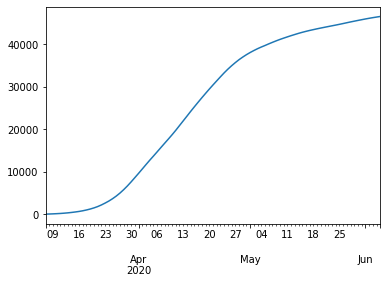

In [40]:
df_pred = df_pred[df_pred[measure] > mincases]
df_pred['cumul'] = df_pred[measure].cumsum()
df_pred['cumul'].plot()

For correct scaling of the data we need to find the current progress of the outbreak, in other words, what part of the distribution we wil try to fit. The function below takes a progress as input and determines the fit for that assumed amount of progress, returning the residuals of the fit as a measure to be minimized.

Preparing for the fit, we normalize our input and scale with the current number for progress. Preventing numerical errors we select cases below one, taking the double negative logarithm after we make sure the input is at least 10 measures, to prevent spurious fits. (Such as fitting a line on just two measures, which would be perfect but not relevant.)

In [41]:
from scipy.stats import linregress

def fitres(progress):
    """Try to fit a line according to progress, returning correlation of fit"""
    global df_pred, slope, intercept
    
    # Scale the cumulative measure and only keep cases below 1 for fitting
    df_pred['scaled'] = df_pred['cumul'] / numcases * progress
    df_fit = df_pred[df_pred['scaled'] < 1].copy()
    
    # Only try fitting if we have at least 5 measures left.
    if len(df_fit) > 4:
        df_fit['linear'] = gumbelinv(df_fit['scaled'])
        slope, intercept, rvalue, pvalue, stderr = linregress(df_fit[['daynum', 'linear']])
        print('Progress {:7.3f}% rsquared {:8.6f} for {:3.0f} measures'.format(
            progress * 100, rvalue ** 2, len(df_fit)))
        return(1 - rvalue)
    else:
        return np.nan

An optimizer can call the function repeatedly to find the input that returns the best output. In this case `minimize` will find the progress that returns the lowest residuals, indicating the best fit. We use the `bound` method of `minimize_scalar` to find the minimum value. We assume at least 10% progress in the outbreak and allow for fitting on data where the first wave is already finished, to a maximum of 150%.

In [42]:
from scipy.optimize import minimize_scalar

optim = minimize_scalar(fitres, method='bounded', bounds=(0, 1.5), options={'disp':2})

Progress  57.295% rsquared 0.911661 for  91 measures
Progress  92.705% rsquared 0.988305 for  91 measures
Progress 114.590% rsquared 0.926380 for  62 measures
Progress  87.444% rsquared 0.974278 for  91 measures
Progress  96.617% rsquared 0.997601 for  91 measures
Progress 103.482% rsquared 0.969826 for  81 measures
Progress  99.239% rsquared 0.992412 for  91 measures
Progress  96.444% rsquared 0.997318 for  91 measures
Progress  97.164% rsquared 0.998299 for  91 measures
Progress  97.956% rsquared 0.998448 for  91 measures
Progress  97.676% rsquared 0.998555 for  91 measures
Progress  97.645% rsquared 0.998554 for  91 measures
Progress  97.669% rsquared 0.998555 for  91 measures
Progress  97.670% rsquared 0.998555 for  91 measures
Progress  97.670% rsquared 0.998555 for  91 measures
Progress  97.669% rsquared 0.998555 for  91 measures

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )


The optimization gives detailed results, such as the best result in `fun`, the number of iterations in `nfev` and the optimal input in `x`. That number represents the progress, e.g. a result of `0.77` would mean that we estimate the outbreak at 77% of total cases for the current wave. We call `fitres` one more time to obtain the fit for the best value of progress.

In [43]:
print(optim)
progress = optim.x
rsquared = (1 - optim.fun) ** 2
bestfit  = fitres(progress)

     fun: 0.0007228697534433781
 message: 'Solution found.'
    nfev: 16
  status: 0
 success: True
       x: 0.9766952976376059
Progress  97.670% rsquared 0.998555 for  91 measures


The `scaled` column contains the scaled cumulative distribution that should approach the correct part of a gumbel cumulative distribution for values below 1.

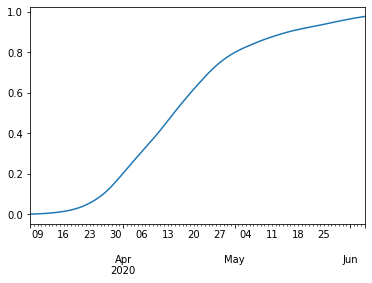

In [44]:
df_pred['scaled'].plot()

We can check the fit with `polyval`, applying the linear factors to the input column with day numbers and plotting both `linear` and `fitted` for a visual check.

Slope 0.061635 with intercept at -6.136


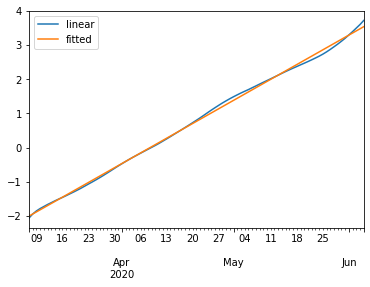

In [45]:
print('Slope {:1.6f} with intercept at {:1.3f}'.format(slope, intercept))
df_pred['linear'] = gumbelinv(df_pred[df_pred['scaled'] < 1]['scaled'])
df_pred['fitted'] = slope * df_pred['daynum'] + intercept
df_pred[['linear', 'fitted']].plot()

From slope and intercept of this line we calculate beta and mu of the Gumbel distribution by converting `y = ax + b` to `y = (x - mu) / beta`, where `beta = 1 / a` and `mu = -b / a`.

In [46]:
beta = 1 / slope
mu = - intercept / slope
print('Gumbel beta {:1.3f} with mu at {:1.0f}'.format(beta, mu))

Gumbel beta 16.225 with mu at 100


Finished fitting, now back to the original data! We apply the Gumbel function to `daynum` and scale the result back to the number of cases according to the estimated progress. The result is the CDF, so we reduce that to the PDF by taking the gradient. To visually check the fit, we plot the cumulative curves.

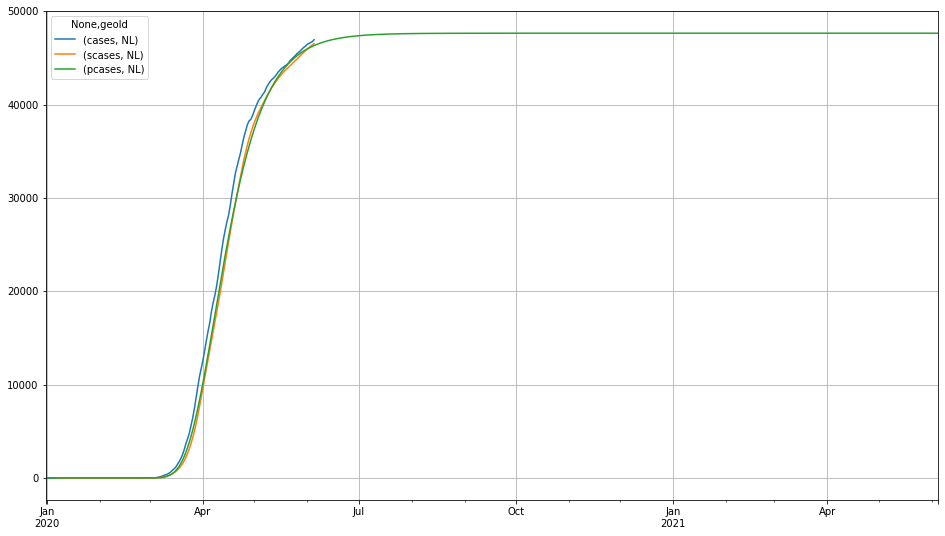

In [47]:
df_geo[(pmeasure, country)] = np.gradient(gumbelval(df_geo['daynum'], beta, mu) * numcases / progress)
df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].cumsum().plot(
    figsize=(16, 9), grid=True)

We have the daily new case data in our dataframe.

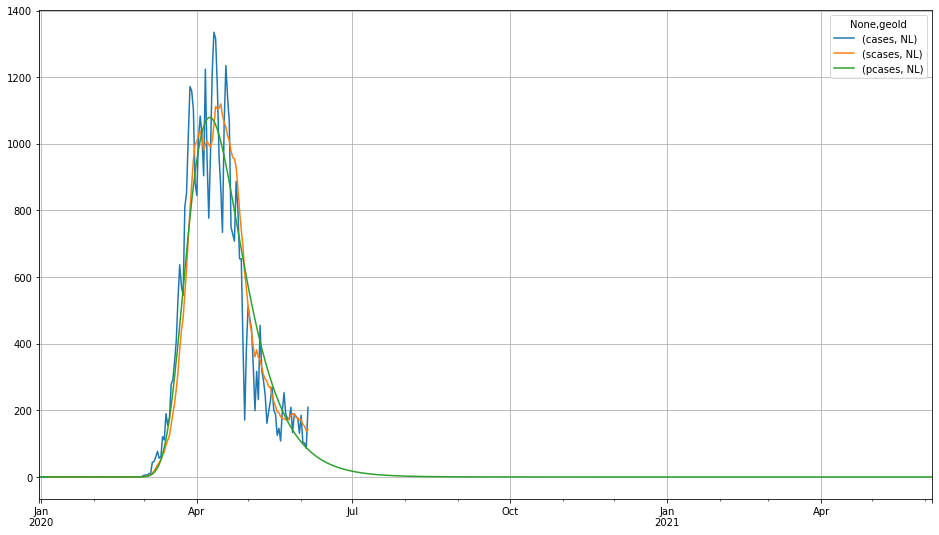

In [48]:
df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].plot(
    figsize=(16, 9), grid=True)

The sum of our data would be the estimated total number, which should match the current number of cases and estimated progress.

In [49]:
final = df_geo[pmeasure][country].sum()
print('Final of {:1.0f} from an optimization estimate of {:1.0f}'.format(final, numcases / progress))

Final of 47638 from an optimization estimate of 47638


The peak can be found at the first predicted value that is larger than the next.

In [50]:
peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))].index.min()
print('Peak at {}'.format(peak.date()))

Peak at 2020-04-09


This date should match the `mu` of our distribution, in days since the start of the index.

In [51]:
df_geo.loc[df_geo['daynum'] == mu.astype(int)].index

DatetimeIndex(['2020-04-08'], dtype='datetime64[ns]', freq='D')

The floor is defined as the first time that the number of reported cases falls below 1 in a million, which is the first time that happens *after* the peak.

In [52]:
floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) & (
    df_geo[(pmeasure, country)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Floor at 2020-07-01


Similarly, we can calculate the start as the first day where the number of cases was above 1 in a million before the peak.

In [53]:
start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) & (
    df_geo[(pmeasure, country)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

Start at 2020-03-08


We define the maximum delta as the day in the curve with the sharpest rise.

In [54]:
maxrise = (df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()).max()
maxdelta = df_geo[(df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

Largest rise of 56 on 2020-03-24


This should match the maximum gradient of the daily data.

In [55]:
print('Maximum gradient is {:1.0f}'.format(np.gradient(df_geo[(pmeasure, country)]).max()))

Maximum gradient is 56


Back to the original curve, showing the number of infected concurrently.

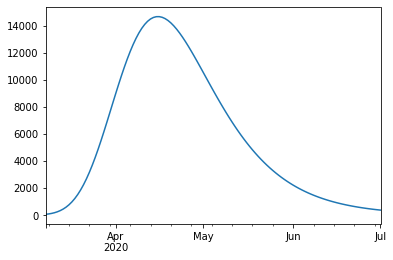

In [56]:
df_geo[pmeasure][country].rolling(14).sum().loc[start:floor].plot()

The top of this curve gives the maximum number of people that are infected at the same time.

In [57]:
print('Maximum infected is {:1.0f}'.format(df_geo[pmeasure][country].rolling(14).sum().max()))

Maximum infected is 14657


If we look at the difference between our actual (smoothed) value and our prediction, we can try to determine if the curve is breaking out after the floor. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

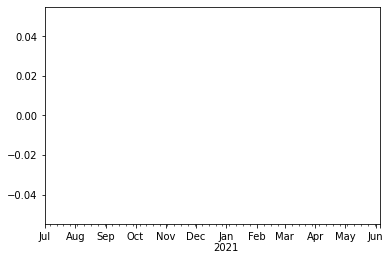

In [58]:
(df_geo[(smeasure, country)] - df_geo[(pmeasure, country)]).loc[floor:].plot()

Keep exploring! Stay home, wash your hands, keep your distance.